# Mapeo del colectivo LGTBI en Europa en el ámbito laboral


## Proyecto EDA Bootcamp Data Science Nov 2020 Full-time 
### María del Mar Delgado Domínguez

Importamos librerias que utilizaremos a lo largo del documento 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob 
import plotly.express as px

Los pasos que se han realizado a lo largo del proyecto y cuanto tiempo se ha destinado a cada uno

In [8]:
from UTILS.visualization_tb import proyect_steps
proyect_steps()

### Importamos dataset

In [9]:
from UTILS.folders_tb import living_data, discrimination_data, socio_data, data
living_data

,CountryCode,target_group,subset,question_code,question_label,answer,percentage,notes
0,Austria,All,All,DEXa13,How old were you when you realised for the fir...,5y.o. or less,2,NaN
1,Austria,All,All,DEXa13,How old were you when you realised for the fir...,6-9y.o.,7,NaN
2,Austria,All,All,DEXa13,How old were you when you realised for the fir...,10-14y.o.,40,NaN
3,Austria,All,All,DEXa13,How old were you when you realised for the fir...,15-17y.o.,27,NaN
4,Austria,All,All,DEXa13,How old were you when you realised for the fir...,18-24y.o.,15,NaN
...,...,...,...,...,...,...,...,...
5695,EU-28,All,All,DEXschool_leav,Did you ever consider leaving or changing scho...,No,89,NaN
5696,North Macedonia,All,All,DEXschool_leav,Did you ever consider leaving or changing scho...,Yes,18,NaN
5697,North Macedonia,All,All,DEXschool_leav,Did you ever consider leaving or changing scho...,No,82,NaN
5698,Serbia,All,All,DEXschool_leav,Did you ever consider leaving or changing scho...,Yes,16,NaN


In [4]:
data

,CountryCode,target_group,subset,question_code,question_label,answer,percentage,notes
0,Austria,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,Yes,47,NaN
1,Austria,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,No,53,NaN
2,Belgium,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,Yes,69,NaN
3,Belgium,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,No,31,NaN
4,Bulgaria,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,Yes,62,NaN
...,...,...,...,...,...,...,...,...
6193,Serbia,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Fear of a homophobic and/or transphobic reacti...,29,NaN
6194,Serbia,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Because of my migration status,2,NaN
6195,Serbia,All,All,DEXindv6_3,Why did you not report the last incident of ha...,I was engaged in sex work,1,NaN
6196,Serbia,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Other reason,4,NaN


In [5]:
#Total paises, debemos restarle EU-28 que es el total
len(data.CountryCode.unique())

31

In [6]:
#Total de preguntas
len(data.question_label.unique())

110

In [7]:
#EU-28 engloba el conjunto de todos los paises de la Unión Europea, es el global. 
EU= data.loc[data["CountryCode"]== "EU-28"]
EU

,CountryCode,target_group,subset,question_code,question_label,answer,percentage,notes
56,EU-28,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,Yes,61,NaN
57,EU-28,All,All,DEXaware_eqbod,Knowledge of at least one equality body in cou...,No,39,NaN
118,EU-28,All,All,DEXaware_suporg,NaN,Yes,66,NaN
119,EU-28,All,All,DEXaware_suporg,NaN,No,34,NaN
236,EU-28,All,All,DEXc10_a,During your time at school has anyone supporte...,Always,9,NaN
...,...,...,...,...,...,...,...,...
6169,EU-28,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Fear of a homophobic and/or transphobic reacti...,25,NaN
6170,EU-28,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Because of my migration status,1,NaN
6171,EU-28,All,All,DEXindv6_3,Why did you not report the last incident of ha...,I was engaged in sex work,1,NaN
6172,EU-28,All,All,DEXindv6_3,Why did you not report the last incident of ha...,Other reason,7,NaN


### Importamos funciones question y answer para saber lo que contiene cada pregunta y cada respuesta, de esta manera podemos seleccionar lo que queremos analizar

In [10]:
from UTILS.mining_data_tb import question, answer
discrimination_question= question(dt=discrimination_data)
socio_question= question(dt=socio_data)
living_question= question(dt=living_data)

### Importamos las respuestas para saber como poder agruparlas y cuales son las respuestas de cada pregunta. 

In [11]:
discrimination_answer= answer(dt=discrimination_data)
socio_answer= answer(dt=socio_data)
living_answer= answer(dt=living_data)


### Dataset filtrados por las preguntas que quiero analizar, limpiando las columnas y para ello se ha cambiando la columna percentage a int, se ha eliminado EU-28 ya que es el total y no queremos que interfiera en la media de los paises

In [12]:
from UTILS.mining_data_tb import lw, dw, sw

In [11]:
lw()

,CountryCode,question_label,answer,percentage
1422,Austria,To how many work colleagues are you open about...,None,33
1423,Austria,To how many work colleagues are you open about...,A few,25
1424,Austria,To how many work colleagues are you open about...,Most,17
1425,Austria,To how many work colleagues are you open about...,All,25
1426,Belgium,To how many work colleagues are you open about...,None,27
...,...,...,...,...
4735,North Macedonia,Openness about being LGBTI at work,Selectively open,46
4736,North Macedonia,Openness about being LGBTI at work,Hide LGBT identity,46
4737,Serbia,Openness about being LGBTI at work,Very open,9
4738,Serbia,Openness about being LGBTI at work,Selectively open,47


###  La mayoria de personas que han contestado al cuestionario estan trabajando, ya sea por cuenta ajena o propia 

In [13]:
from UTILS.visualization_tb import visualization_status
visualization_status(sw()) 

### Filtramos la pregunta donde expresan en que lugares evitan mostrarse abiertamente y modificamos el tipo de percentage. Directamente importamos la función data_avoid ya limpiada

In [14]:
from UTILS.mining_data_tb import data_avoid
data_avoid().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 4740 to 5080
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CountryCode     330 non-null    object
 1   target_group    330 non-null    object
 2   subset          330 non-null    object
 3   question_code   330 non-null    object
 4   question_label  330 non-null    object
 5   answer          330 non-null    object
 6   percentage      330 non-null    int32 
 7   notes           0 non-null      object
dtypes: int32(1), object(7)
memory usage: 21.9+ KB


### Importamos las variables total y total_paises para agrupar los datos de data_avoid

In [15]:
from UTILS.mining_data_tb import total, total_paises 
total_avoid = total(dt=data_avoid())
paises_avoid = total_paises(dt=data_avoid())
paises_avoid

question_label  Where do you avoid being open about yourself as LGBTI for fear of being assaulted, threatened or harassed by others?  \
answer                                                                                                 A cafe, restaurant, pub, club   
CountryCode                                                                                                                            
Austria                                                         35                                                                     
Belgium                                                         37                                                                     
Bulgaria                                                        53                                                                     
Croatia                                                         64                                                                     
Cyprus                                                          59                                                                     
Czechia                                                         34                                                                     
Denmark                                                         32                                                                     
Estonia                                                         50                                                                     
Finland                                                         45                                                                     
France                                                          41                                                                     
Germany                                                         30                                                                     
Greece                                                          40                                                                     
Hungary                                                         47                                                                     
Ireland                                                         35                                                                     
Italy                                                           29                                                                     
Latvia                                                          52                                                                     
Lithuania                                                       50                                                                     
Luxembourg                                                      31                                                                     
Malta                                                           34                                                                     
Netherlands                                                     40                                                                     
North Macedonia                                                 57                                                                     
Poland                                                          51                                                                     
Portugal                                                        32                                                                     
Romania                                                         54                                                                     
Serbia                                                          49                                                                     
Slovakia                                                        54                                                                     
Slovenia                                                

In [105]:
total_avoid

percentage
question_label                                     answer                                                        
Where do you avoid being open about yourself as... A cafe, restaurant, pub, club                        42.666667
                                                   Around my family                                     34.300000
                                                   Dont Know                                             9.333333
                                                   In a healthcare setting (hospital or other medi...   30.000000
                                                   In the street, a square, park, car park or othe...   58.333333
                                                   My home                                              17.433333
                                                   Other                                                13.566667
                                                   Public premises or buildings                         45.733333
                                                   Public transport                                     54.400000
                                                   School                                               26.100000
                                                   Workplace                                            36.500000

### Conclusiones generalizadas de data_avoid

# 1.  
### Representamos los datos por paises, importamos la funcion de visualización 

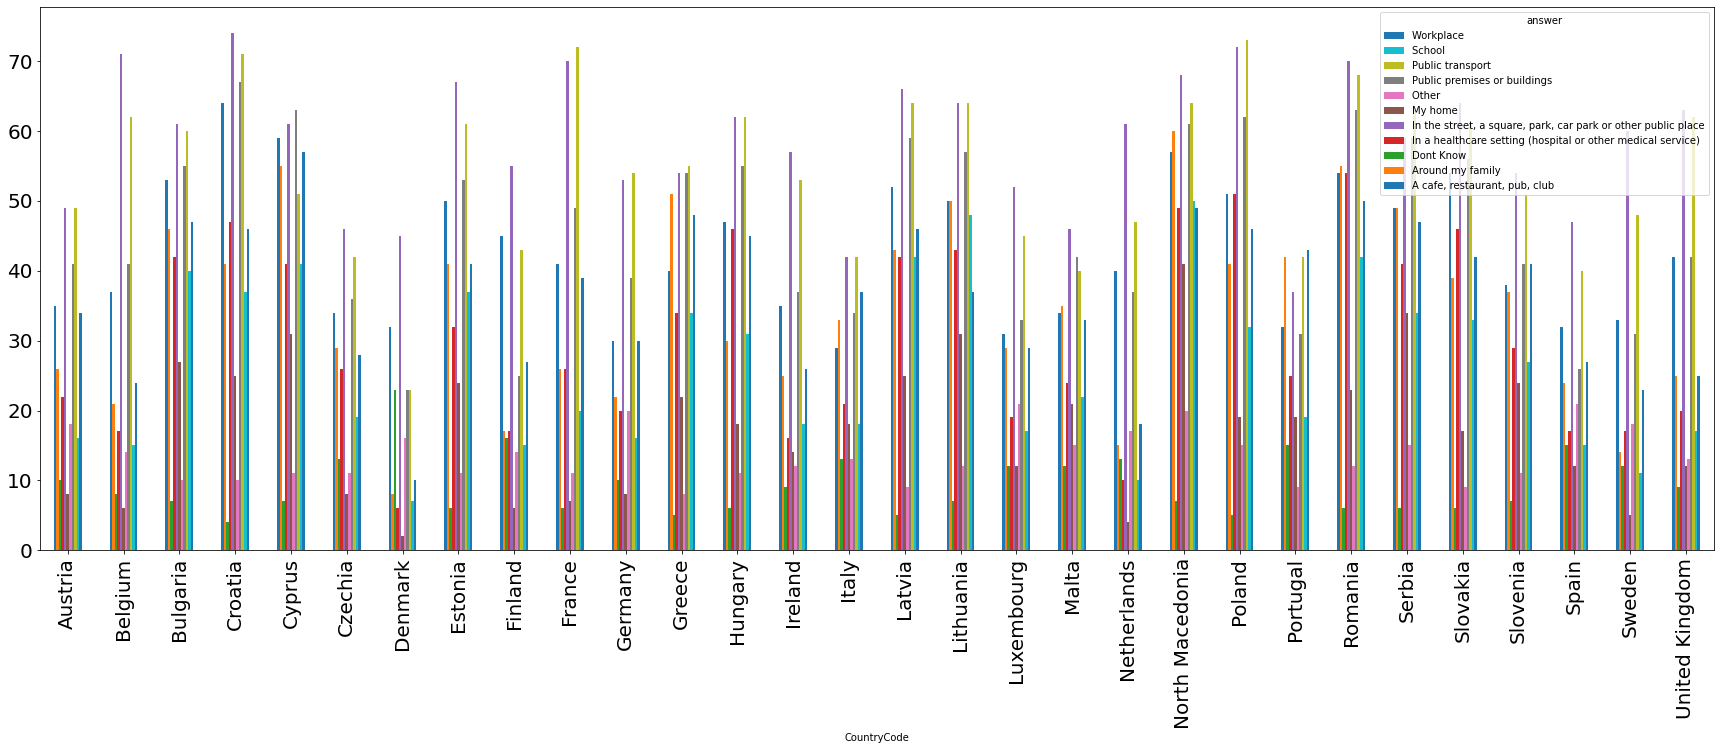

In [16]:
from UTILS.visualization_tb import visualization_avoid
visualization_avoid(dt=paises_avoid)

### Para poder visualizarlo mejor, se han escogido los 7 primeros paises donde las personas evitan menos abrirse en publico y los 7 últimos paises, ordenando ascendentemente por 'Workplace '

In [17]:
from UTILS.mining_data_tb import rank_head, rank_tail
rank_place_head = rank_head(dt=data_avoid(), sort='Workplace ')
rank_place_tail= rank_tail(dt=data_avoid(), sort='Workplace ')

In [30]:
rank_place_head.mean()

answer
A cafe, restaurant, pub, club                                    35.857143
Around my family                                                 18.857143
Dont Know                                                        12.714286
In a healthcare setting (hospital or other medical service)      14.714286
In the street, a square, park, car park or other public place    57.714286
My home                                                           7.857143
Other                                                            15.857143
Public premises or buildings                                     33.857143
Public transport                                                 47.857143
School                                                           13.285714
Workplace                                                        21.857143
dtype: float64

In [31]:
rank_place_tail.mean()

answer
A cafe, restaurant, pub, club                                    52.000000
Around my family                                                 51.285714
Dont Know                                                         6.142857
In a healthcare setting (hospital or other medical service)      43.285714
In the street, a square, park, car park or other public place    62.714286
My home                                                          29.000000
Other                                                            12.142857
Public premises or buildings                                     59.142857
Public transport                                                 60.714286
School                                                           40.428571
Workplace                                                        49.142857
dtype: float64

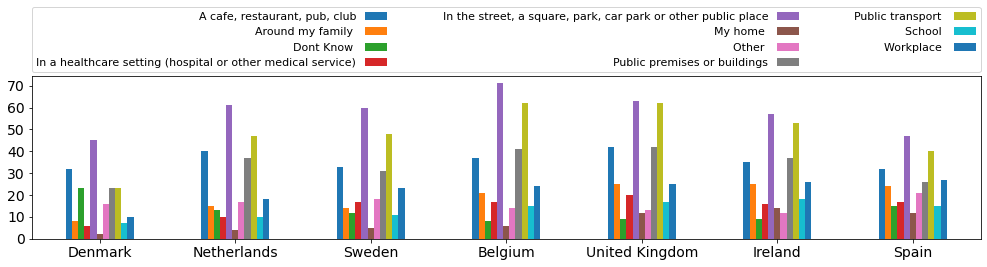

In [18]:
#Top 7 de los paises donde menos evitan ser abiertos en el trabajo 
from UTILS.visualization_tb import visualization_rank_avoid
visualization_rank_avoid(dt=rank_place_head)

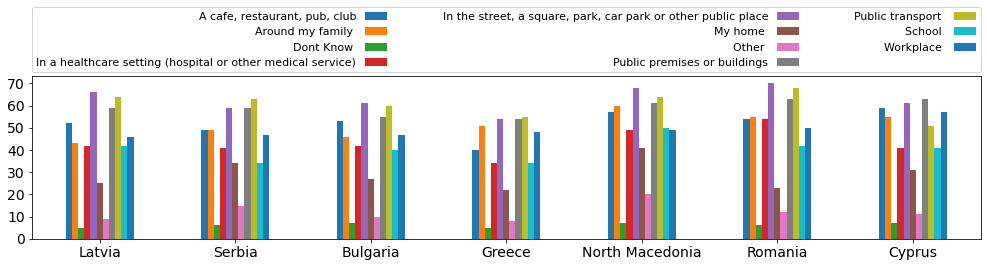

In [19]:
#Top 7 de los paises donde más evitan ser abiertos en el trabajo
visualization_rank_avoid(dt=rank_place_tail)

# 2. 
### Representación global de la pregunta "Openness about being LGBTI at work" para visualizar un resultado generalizado

In [20]:
openness_work= lw().loc[lw()["question_label"]=="Openness about being LGBTI at work"]
openness_work

,CountryCode,question_label,answer,percentage
4647,Austria,Openness about being LGBTI at work,Very open,20
4648,Austria,Openness about being LGBTI at work,Selectively open,58
4649,Austria,Openness about being LGBTI at work,Hide LGBT identity,23
4650,Belgium,Openness about being LGBTI at work,Very open,28
4651,Belgium,Openness about being LGBTI at work,Selectively open,52
...,...,...,...,...
4735,North Macedonia,Openness about being LGBTI at work,Selectively open,46
4736,North Macedonia,Openness about being LGBTI at work,Hide LGBT identity,46
4737,Serbia,Openness about being LGBTI at work,Very open,9
4738,Serbia,Openness about being LGBTI at work,Selectively open,47


In [21]:
from UTILS.visualization_tb import visualization_openness, visualization_rank_being 
visualization_openness(dt=openness_work)

### Ranking de los 7 paises con menos porcentage de ocultación en el trabajo y los 7 paises con más porcentage de ocultación de ser LGTBI en el trabajo

In [22]:
being_work_head= rank_head(dt=openness_work, sort="Hide LGBT identity")
being_work_tail= rank_tail(dt=openness_work, sort="Hide LGBT identity")

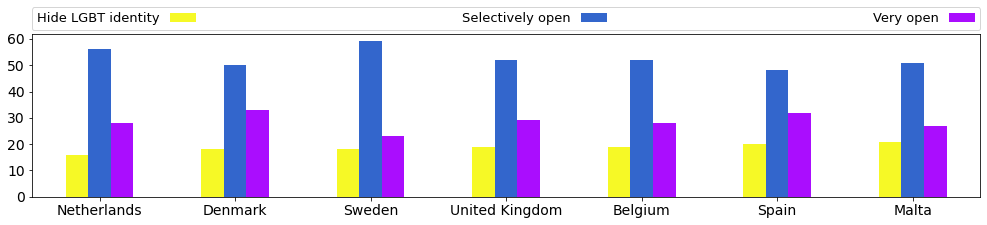

In [23]:
visualization_rank_being(dt=being_work_head)

In [32]:
being_work_head.mean()

answer
Hide LGBT identity    18.714286
Selectively open      52.571429
Very open             28.571429
dtype: float64

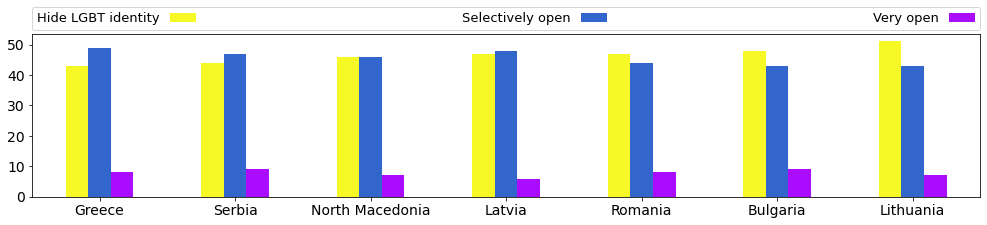

In [24]:
visualization_rank_being(being_work_tail)

In [33]:
being_work_tail.mean()

answer
Hide LGBT identity    46.571429
Selectively open      45.714286
Very open              7.714286
dtype: float64

# 3. 
### Eliminamos la pregunta "Openness about being LGBTI at work", para poder representarla de manera individual

In [25]:
no_open= lw().drop(lw()[lw()["question_label"]== 'Openness about being LGBTI at work'].index)
no_open

,CountryCode,question_label,answer,percentage
1422,Austria,To how many work colleagues are you open about...,None,33
1423,Austria,To how many work colleagues are you open about...,A few,25
1424,Austria,To how many work colleagues are you open about...,Most,17
1425,Austria,To how many work colleagues are you open about...,All,25
1426,Belgium,To how many work colleagues are you open about...,None,27
...,...,...,...,...
1913,North Macedonia,"To how many customers, clients, etc. at work a...",All,3
1914,Serbia,"To how many customers, clients, etc. at work a...",None,83
1915,Serbia,"To how many customers, clients, etc. at work a...",A few,11
1916,Serbia,"To how many customers, clients, etc. at work a...",Most,4


### Visualización de las preguntas filtradas en no_open, sobre como de abierto es el trabajo y con respecto a sus compañeros/as,clientes y superiores

In [26]:
from UTILS.visualization_tb import visualization_living
visualization_living(dt=no_open)

In [6]:
no_open.groupby(["question_label", "answer"])["percentage"].mean()

question_label                                                                      answer
To how many customers, clients, etc. at work are you open about being LGBTI         A few     13.866667
                                                                                    All        6.566667
                                                                                    Most       6.266667
                                                                                    None      73.233333
To how many immediate superiors/heads of department are you open about being LGBTI  A few      9.866667
                                                                                    All       19.600000
                                                                                    Most       6.800000
                                                                                    None      63.833333
To how many work colleagues are you open about being LGBTI                   

### Buscamos saber si hay correlación entre abrirse en el trabajo y si alguna vez ha escuchado a alguien defender proteger o apoyar los derechos de las personas LGTBI en el trabajo 

In [27]:
total_paises_living= total_paises(dt=lw())
total_paises_discrimination= total_paises(dt=dw())
total_paises_discrimination

Lithuania                                                       88                                                          
Luxembourg                                                      93                                                          
Malta                                                           93                                                          
Netherlands                                                     94                                                          
North Macedonia                                                 87                                                          
Poland                                                          89                                                          
Portugal                                                        90                                                          
Romania                                                         88                                                          
Serbia                                                          84                                                          
Slovakia                                                        90                                                          
Slovenia                                                        92                                                          
Spain                                                           89                                                          
Sweden                                                          95                                                          
United Kingdom                                                  91                                                          

question_label       \
answer          Yes   
CountryCode           
Austria          10   
Belgium           7   
Bulgaria         17   
Croatia          10   
Cyprus           18   
Czechia           9   
Denmark           5   
Estonia           8   
Finland           6   
France            8   
Germany          11   
Greece           19   
Hungary          14   
Ireland           8   
Italy            12   
Latvia           13   
Lithuania        12   
Luxembourg        7   
Malta             7   
Netherlands       6   
North Macedonia  13   
Poland           11   
Portugal         10   
Romania          12   
Serbia           16   
Slovakia         10   
Slovenia          8   
Spain            11   
Sweden            5   
United Kingdom    9   

question_label  In the past 5 years has anyone at work supported, defended or protected you and your rights as an LGBTI person at work?  \
answer                                                                                                                           Always   
CountryCode                                                                                                                               
Austria                                                         15                                                                        
Belgium                                                         17                                                                        
Bulgaria                                                        13                                                                        
Croatia                                                         13                                                                        
Cyprus                                                          16                                                                        
Czechia                                                         12                                                                        
Denmark                                                         20                                                                        
Estonia                                                         13                                 

In [28]:
new_data= pd.merge(total_paises_living["Openness about being LGBTI at work"],total_paises_discrimination["In the past 5 years have you heard or seen anyone at work support, protect or promote the rights of LGBTI people at work?"], on= "CountryCode")
new_data

answer,Hide LGBT identity,Selectively open,Very open,Always,Never,Often,Rarely
CountryCode,,,,,,,
Austria,23,58,20,8,32,32,28
Belgium,19,52,28,10,24,34,32
Bulgaria,48,43,9,5,48,15,32
Croatia,41,50,9,7,24,24,45
Cyprus,38,53,9,4,32,26,38
Czechia,27,57,16,5,42,22,31
Denmark,18,50,33,10,30,28,32
Estonia,31,60,10,6,35,26,33
Finland,27,65,8,6,31,29,33


### Matrix de correlación entre las preguntas Openness about being LGBTI at work y In the past 5 years have you heard or seen anyone at work support, protect or promote the rights of LGBTI people at work?
Con esta matrix se puede afirmar que cuanto mas abierto es en el trabajo mas protegen los derechos en el trabajo y viceversa

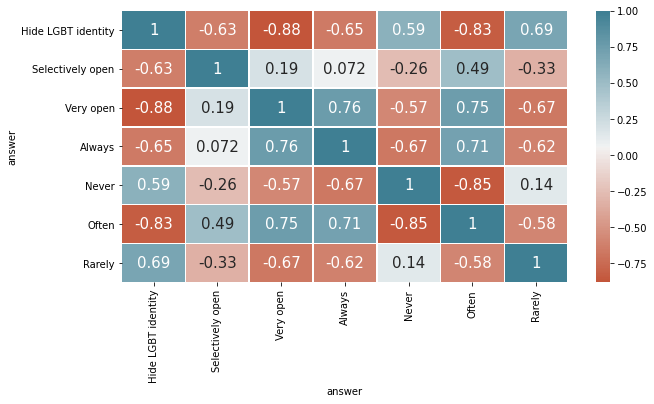

In [29]:
from UTILS.visualization_tb import matrix
matrix(dt= new_data)